$\Huge{\text{Linear Regression with Regularizers}}$

In this session, we shall learn about linear regression when we impose regularizers on the parameters. 

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers. 

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np 
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. 
The data set we will consider represents miles per gallon for different car models as a response variable dependent on multiple attributes. 


In [ ]:
#Let us explore the data and the description 

#Get the data from the web 
auto_mpg_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
auto_mpg_data.head()


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
auto_mpg_data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [ ]:
import urllib.request  #this package is useful for accessing text files over internet 
auto_mpg_data_description_file = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names')


for line in auto_mpg_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

1. Title: Auto-Mpg Data



2. Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is

                maintained at Carnegie Mellon University. The dataset was 

                used in the 1983 American Statistical Association Exposition.

   (c) Date: July 7, 1993



3. Past Usage:

    -  See 2b (above)

    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.

       In Proceedings on the Tenth International Conference of Machine 

       Learning, 236-243, University of Massachusetts, Amherst. Morgan

       Kaufmann.



4. Relevant Information:



   This dataset is a slightly modified version of the dataset provided in

   the StatLib library.  In line with the use by Ross Quinlan (1993) in

   predicting the attribute "mpg", 8 of the original instances were removed 

   because they had unknown values for the "mpg" attribute.  The original 

   dataset is available in the file "auto-mpg.data-original".



   "The data concerns cit

Having known the data description, let us insert the descriptions into the data now.

In [ ]:
auto_mpg_data.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration','model year','origin','car name']


#check by printing the data again
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
##Counting number of missing values in each column
for col in auto_mpg_data.columns.values:
  val = set(auto_mpg_data[col])
  null_val = sum(pd.isna(auto_mpg_data[col]))
  print(col + ': ' + str(auto_mpg_data[col].dtypes) + ', ' + str(len(val)) + ' unique values, ' + str(null_val) + ' null values!')

# auto_mpg_data.isnull().sum()

mpg: float64, 129 unique values, 0 null values!
cylinders: int64, 5 unique values, 0 null values!
displacement: float64, 82 unique values, 0 null values!
horsepower: object, 94 unique values, 0 null values!
weight: float64, 351 unique values, 0 null values!
acceleration: float64, 95 unique values, 0 null values!
model year: int64, 13 unique values, 0 null values!
origin: int64, 3 unique values, 0 null values!
car name: object, 305 unique values, 0 null values!


In [ ]:
# auto_mpg_data = auto_mpg_data.astype(float)

**Dropping the rows that contains "?" in the column "Horsepower"**

Syntax = df[ df[ “column” ].str.contains( “someString” )==False ]

In [ ]:
auto_mpg_data = auto_mpg_data.replace('?', np.nan) #replacing '?' values by nan values

In [ ]:
auto_mpg_data = auto_mpg_data.dropna() #dropping the nan values
auto_mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
auto_mpg_data = auto_mpg_data.drop('car name', axis = 1) #dropping the column 'car name' as we don't need it
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
auto_mpg_data = auto_mpg_data.astype(float) #converting all the columns of the dataframe to float datatype

**Making a Train-Test-Validation split..**

In [ ]:
auto_mpg_train_initial = auto_mpg_data.sample(frac=0.8,random_state=200)
auto_mpg_test = auto_mpg_data.drop(auto_mpg_train_initial.index)

len(auto_mpg_train_initial), len(auto_mpg_test)

(314, 78)

In [ ]:
auto_mpg_train = auto_mpg_train_initial.sample(frac=0.8,random_state=200)
auto_mpg_val = auto_mpg_train_initial.drop(auto_mpg_train.index)

len(auto_mpg_train), len(auto_mpg_test), len(auto_mpg_val)

(251, 78, 63)

$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$ 

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

$\Large{\text{Solving the OLS optimization problem}}:$

Assuming the responses $y^1,y^2,\ldots,y^n$ are present in a $n \times 1$ matrix represented as:

$
\mathbf{y}=\begin{bmatrix}
y^1 \\ y^2 \\ \vdots \\ y^n
\end{bmatrix}
$

and the predictor variables $\mathbf{x}^1,\mathbf{x}^2,\ldots,\mathbf{x}^d$ are placed in a $n\times (d+1)$ matrix represented as:

$
\mathbf{X}=\begin{bmatrix}
\leftarrow & \mathbf{x}^1 & \rightarrow & 1 \\
\leftarrow & \mathbf{x}^2 & \rightarrow & 1 \\
\leftarrow & \ldots & \rightarrow & 1  \\
\leftarrow & \mathbf{x}^n & \rightarrow & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
{x}_1^1 & {x}_2^1 &\ldots & {x}_d^1 & 1 \\
{x}_1^2 & {x}_2^2 &\ldots & {x}_d^2 & 1 \\
\vdots & \vdots & \ldots & \vdots \\
{x}_1^n & {x}_2^n &\ldots & {x}_d^n & 1 
\end{bmatrix}
$
where note that the last column of matrix $\mathbf{X}$ contains a column of all ones. This column is useful to incorporate the effect of $\beta_0$ parameter in $\mathbf{X}$ matrix. 

Similarly assume that 
 we can write the coefficients $\beta_0,\beta_1,\ldots,\beta_d$ as a $(d+1)\times 1$ matrix represented as:

$
\mathbf{\beta} = \begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}.
$

Now we can write the objective function as:

$
L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2.
$

To solve 

$
\min_\beta L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is valid only when $(\mathbf{X}^\top\mathbf{X})^{-1}$ is invertible. Otherwise we need to solve the system given by:

$
\mathbf{X}^\top\mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
$
using a solver. 



$\Large{\text{Computing } \beta \text{ for the mpg data set}}:$

In [ ]:
#Let us now compute beta 
n_train = len(auto_mpg_train.index) #number of data points in the data set
print('number of data points in the training data set:',n_train)
n_test = len(auto_mpg_test.index) #number of data points in the data set
print('number of data points in the testing data set:',n_test)
n_val = len(auto_mpg_val.index) #number of data points in the data set
print('number of data points in the validation data set:',n_val)

number of data points in the training data set: 251
number of data points in the testing data set: 78
number of data points in the validation data set: 63


In [ ]:
#extract the predictor variable columns 
cols = [1,2,3,4,5,6,7]
X_train = auto_mpg_train[auto_mpg_train.columns[cols]]
X_val = auto_mpg_val[auto_mpg_val.columns[cols]]
X_test = auto_mpg_test[auto_mpg_test.columns[cols]]

In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
28,8.0,304.0,193.0,4732.0,18.5,70.0,1.0
154,6.0,250.0,72.0,3432.0,21.0,75.0,1.0
337,4.0,107.0,72.0,2290.0,17.0,80.0,3.0
93,8.0,318.0,150.0,4237.0,14.5,73.0,1.0
109,4.0,140.0,72.0,2401.0,19.5,73.0,1.0
...,...,...,...,...,...,...,...
371,4.0,135.0,84.0,2525.0,16.0,82.0,1.0
12,8.0,400.0,150.0,3761.0,9.5,70.0,1.0
379,4.0,98.0,70.0,2125.0,17.3,82.0,1.0
199,6.0,225.0,100.0,3651.0,17.7,76.0,1.0


In [ ]:
#convert predictor variable columns into a numpy array

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

In [ ]:
X_train

array([[  8. , 304. , 193. , ...,  18.5,  70. ,   1. ],
       [  6. , 250. ,  72. , ...,  21. ,  75. ,   1. ],
       [  4. , 107. ,  72. , ...,  17. ,  80. ,   3. ],
       ...,
       [  4. ,  98. ,  70. , ...,  17.3,  82. ,   1. ],
       [  6. , 225. , 100. , ...,  17.7,  76. ,   1. ],
       [  6. , 146. , 120. , ...,  13.8,  81. ,   3. ]])

In [ ]:
import numpy as np
#add a column of ones to X_array
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1), dtype=X_val.dtype)))

In [ ]:
#convert predictor variable columns into a numpy array

response_cols = [0]
Y_train = auto_mpg_train[auto_mpg_train.columns[response_cols]].to_numpy()
Y_test = auto_mpg_test[auto_mpg_test.columns[response_cols]].to_numpy()
Y_val = auto_mpg_val[auto_mpg_val.columns[response_cols]].to_numpy()

In [ ]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X_train),X_train)
print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X_train),Y_train)
#print('Xy shape:',Xy.shape)

#solving a system of linear equations Ax=b, can be done using np.linalg.solve(A,b)

beta =np.linalg.solve(XTX,Xy)
#beta = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta)



XTX shape: (8, 8)
beta [[-9.25331740e-01]
 [ 1.58272306e-02]
 [-2.18273959e-02]
 [-5.49403048e-03]
 [-1.88172751e-01]
 [ 7.43821476e-01]
 [ 9.98127605e-01]
 [-1.13539831e+01]]


In [ ]:
print(np.linalg.matrix_rank(XTX))
XTX_inv = np.linalg.inv(XTX)

# print(np.matmul(XTX,XTX_inv))
is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

8
False


$\textbf{Note:}$ Because the matrix $X^\top X$ is full-rank, that is, $8:= \text{rank}(X^\top X)=8$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. But, if it would have been not a full rank matrix, numpy would have raised an error. Hence we will use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error or not. 

In [ ]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X_train),X_train)
#print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X_train),Y_train)
#print('Xy shape:',Xy.shape)

beta =scipy.linalg.solve(XTX,Xy)
#beta = np.matmul(scipy.linalg.inv(XTX),Xy)

In [ ]:
beta

array([[-9.25331740e-01],
       [ 1.58272306e-02],
       [-2.18273959e-02],
       [-5.49403048e-03],
       [-1.88172751e-01],
       [ 7.43821476e-01],
       [ 9.98127605e-01],
       [-1.13539831e+01]])

Let us compute the condition number of $X^\top X$.

In [ ]:
#condition number of XTX
print(np.linalg.cond(XTX))

7311294161.881661


We can see that the ill-conditioning of $X^\top X$ might lead to wild changes in solutions of linear regression parameters, even for small changes in the output $\mathbf{y}$. 

$\textbf{Adding $\ell_2$ regularizer to improve the conditioning of the matrix}$: 

We shall motivate the use of $\ell_2$ regularizer to improve the conditioning of the matrix. 

Instead of minimizing the original OLS objective 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

we shall now minimize the OLS objective added with a scaled $\ell_2$ regularizer. 

The $\ell_2$ regularizer in $\beta \in {\mathbb{R}}^{d+1}$ is defined as the squared $\ell_2$ norm of $\beta$: 

$
\begin{align}
\|\beta\|_2^2 = \sum_{i=1}^{d+1} \beta_i^2.  
\end{align}
$

Hence we shall now solve: 
$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

The above objective function is called $\textbf{ridge}$ regression objective. $\lambda>0$ is a regularization hyperparameter. 



Now we can write the objective function as:

$
L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2.
$

To solve 

$
\min_\beta L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L_{\text{ridge}}(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta + \lambda I\beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X}+\lambda I)^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is always valid since $(\mathbf{X}^\top\mathbf{X}+\lambda I)$ is invertible.  


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [ ]:
lambdas = np.array([0,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,5,10,20,50,100,1000,10000])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 0.0 cond(XTX+lambda I): 7311294161.881661
lambda: 1e-05 cond(XTX+lambda I): 7311073315.022361
lambda: 0.0001 cond(XTX+lambda I): 7309086293.222314
lambda: 0.001 cond(XTX+lambda I): 7289275318.460433
lambda: 0.01 cond(XTX+lambda I): 7096916348.941895
lambda: 0.1 cond(XTX+lambda I): 5615123753.906714
lambda: 1.0 cond(XTX+lambda I): 1818405217.6621008
lambda: 2.0 cond(XTX+lambda I): 1038324377.7738916
lambda: 5.0 cond(XTX+lambda I): 454016446.49430674
lambda: 10.0 cond(XTX+lambda I): 234282454.86158705
lambda: 20.0 cond(XTX+lambda I): 119048619.5546229
lambda: 50.0 cond(XTX+lambda I): 48089266.2518731
lambda: 100.0 cond(XTX+lambda I): 24123970.055389542
lambda: 1000.0 cond(XTX+lambda I): 2419583.080935612
lambda: 10000.0 cond(XTX+lambda I): 242031.2953242821


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1,0, 1, 10, 100\}$ , let us now solve for $\beta$ and check the solutions.

In [ ]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

betas = [] 
for lambda_ in lambdas:
  beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
  print('lambda:',lambda_)
  print('beta:',beta)
  print('***************')
  betas.append(beta)

lambda: 0.0
beta: [[-9.25331740e-01]
 [ 1.58272306e-02]
 [-2.18273959e-02]
 [-5.49403048e-03]
 [-1.88172751e-01]
 [ 7.43821476e-01]
 [ 9.98127605e-01]
 [-1.13539831e+01]]
***************
lambda: 1e-05
beta: [[-9.25335769e-01]
 [ 1.58272821e-02]
 [-2.18278564e-02]
 [-5.49402163e-03]
 [-1.88176328e-01]
 [ 7.43818165e-01]
 [ 9.98126863e-01]
 [-1.13536404e+01]]
***************
lambda: 0.0001
beta: [[-9.25372015e-01]
 [ 1.58277454e-02]
 [-2.18319989e-02]
 [-5.49394204e-03]
 [-1.88208513e-01]
 [ 7.43788369e-01]
 [ 9.98120182e-01]
 [-1.13505569e+01]]
***************
lambda: 0.001
beta: [[-9.25733353e-01]
 [ 1.58323641e-02]
 [-2.18732996e-02]
 [-5.49314848e-03]
 [-1.88529397e-01]
 [ 7.43491295e-01]
 [ 9.98053539e-01]
 [-1.13198144e+01]]
***************
lambda: 0.01
beta: [[-9.29237290e-01]
 [ 1.58771226e-02]
 [-2.22742553e-02]
 [-5.48544579e-03]
 [-1.91644893e-01]
 [ 7.40606728e-01]
 [ 9.97403202e-01]
 [-1.10213131e+01]]
***************
lambda: 0.1
beta: [[-9.55869568e-01]
 [ 1.62149798e-02]
 

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

[array([3.5711635]), array([-4.45685957]), array([0.61353453]), array([1.70730372]), array([-3.02548928]), array([4.6275893]), array([-0.4516639]), array([2.7479385]), array([-0.11664487]), array([4.22774451]), array([0.46686316]), array([-3.72045732]), array([3.44005399]), array([-0.36208075]), array([-4.00038594]), array([5.93347631]), array([6.86511281]), array([0.30642365]), array([2.67546235]), array([0.53970976]), array([-3.40051233]), array([5.21804232]), array([1.77628531]), array([-0.96484083]), array([1.9839962]), array([-0.23344756]), array([-6.14936581]), array([-0.60835058]), array([-1.20862749]), array([2.85687358]), array([0.75404598]), array([-2.28418138]), array([9.70649101]), array([-1.29314936]), array([1.45420818]), array([1.47799395]), array([-1.03490071]), array([-0.96520914]), array([-2.83379367]), array([-5.80641366]), array([-1.0539203]), array([-2.55529845]), array([3.00790526]), array([-0.04779943]), array([2.16253322]), array([2.70256134]), array([-3.7533684

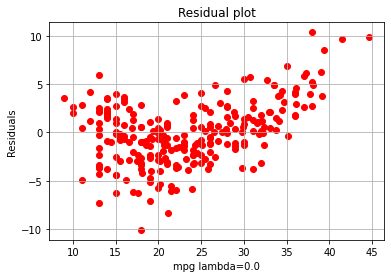

[array([3.5711831]), array([-4.45686395]), array([0.61354329]), array([1.70730281]), array([-3.02549892]), array([4.62758269]), array([-0.45168151]), array([2.74793051]), array([-0.11663126]), array([4.22774748]), array([0.46686638]), array([-3.72046424]), array([3.44006743]), array([-0.36210163]), array([-4.00037197]), array([5.93345913]), array([6.86510176]), array([0.30642851]), array([2.67547413]), array([0.53970037]), array([-3.40050533]), array([5.21804541]), array([1.77629763]), array([-0.96484167]), array([1.98399308]), array([-0.23344376]), array([-6.14935452]), array([-0.60835833]), array([-1.20864877]), array([2.8568855]), array([0.75402319]), array([-2.2841907]), array([9.7064944]), array([-1.29315591]), array([1.45422002]), array([1.47798935]), array([-1.03492137]), array([-0.96524006]), array([-2.83378409]), array([-5.80640916]), array([-1.05393246]), array([-2.55530446]), array([3.00792769]), array([-0.04780704]), array([2.16254682]), array([2.70255444]), array([-3.75334

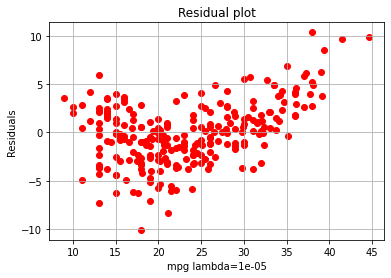

[array([3.57135945]), array([-4.4569034]), array([0.6136221]), array([1.7072946]), array([-3.0255857]), array([4.62752319]), array([-0.45183992]), array([2.7478586]), array([-0.11650874]), array([4.22777416]), array([0.46689537]), array([-3.7205265]), array([3.44018844]), array([-0.36228955]), array([-4.00024625]), array([5.93330456]), array([6.86500227]), array([0.30647224]), array([2.67558015]), array([0.53961587]), array([-3.40044236]), array([5.21807322]), array([1.77640853]), array([-0.9648492]), array([1.98396496]), array([-0.23340951]), array([-6.14925296]), array([-0.60842808]), array([-1.2088402]), array([2.85699272]), array([0.75381812]), array([-2.28427457]), array([9.70652487]), array([-1.29321483]), array([1.45432648]), array([1.47794798]), array([-1.03510725]), array([-0.96551829]), array([-2.83369792]), array([-5.80636868]), array([-1.05404194]), array([-2.55535862]), array([3.00812954]), array([-0.04787547]), array([2.16266919]), array([2.70249236]), array([-3.75317505]

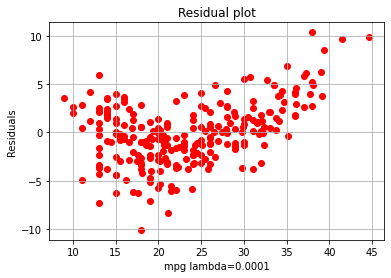

[array([3.57311763]), array([-4.45729667]), array([0.61440798]), array([1.70721268]), array([-3.02645092]), array([4.62692994]), array([-0.45341928]), array([2.74714168]), array([-0.11528723]), array([4.22804016]), array([0.46718439]), array([-3.72114721]), array([3.44139489]), array([-0.36416315]), array([-3.99899284]), array([5.93176349]), array([6.86401036]), array([0.30690827]), array([2.67663717]), array([0.53877344]), array([-3.39981452]), array([5.21835039]), array([1.77751425]), array([-0.96492426]), array([1.98368465]), array([-0.23306803]), array([-6.14824044]), array([-0.60912342]), array([-1.21074881]), array([2.85806167]), array([0.75177345]), array([-2.28511076]), array([9.7068287]), array([-1.29380233]), array([1.45538799]), array([1.47753552]), array([-1.03696052]), array([-0.96829228]), array([-2.83283879]), array([-5.80596497]), array([-1.05513344]), array([-2.55589864]), array([3.01014207]), array([-0.04855784]), array([2.16388929]), array([2.70187343]), array([-3.75

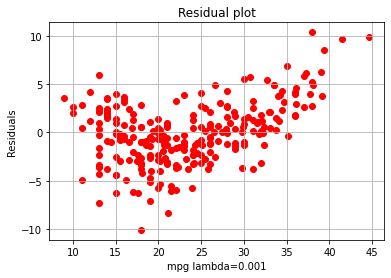

[array([3.59018328]), array([-4.4611125]), array([0.62204274]), array([1.70641517]), array([-3.03485209]), array([4.62116601]), array([-0.46875471]), array([2.740182]), array([-0.10342522]), array([4.23062341]), array([0.46999169]), array([-3.72717144]), array([3.45311035]), array([-0.38235589]), array([-3.98682247]), array([5.91680627]), array([6.85437791]), array([0.3111464]), array([2.68689886]), array([0.53059538]), array([-3.39372078]), array([5.22103983]), array([1.78825073]), array([-0.96565266]), array([1.98096162]), array([-0.22975239]), array([-6.13841307]), array([-0.61587197]), array([-1.22927932]), array([2.86843541]), array([0.73191642]), array([-2.2932309]), array([9.70977873]), array([-1.29951568]), array([1.46569794]), array([1.47352812]), array([-1.05495947]), array([-0.99522493]), array([-2.82449538]), array([-5.8020409]), array([-1.06573264]), array([-2.56114553]), array([3.02968762]), array([-0.05518666]), array([2.17574081]), array([2.69586153]), array([-3.7345894

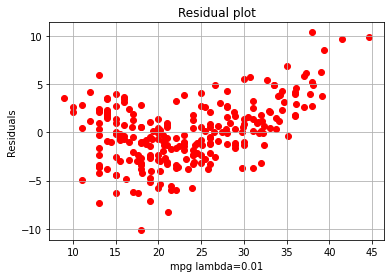

[array([3.72118484]), array([-4.49029021]), array([0.6811817]), array([1.70010372]), array([-3.0995835]), array([4.57647838]), array([-0.58690863]), array([2.68668461]), array([-0.01193311]), array([4.25055853]), array([0.4916922]), array([-3.77336554]), array([3.54344935]), array([-0.52255285]), array([-3.89306325]), array([5.80206815]), array([6.78007903]), array([0.34413591]), array([2.76581487]), array([0.46773474]), array([-3.3469684]), array([5.24161428]), array([1.87097898]), array([-0.97122902]), array([1.95988136]), array([-0.20421531]), array([-6.06302546]), array([-0.66761731]), array([-1.37190202]), array([2.94791069]), array([0.57864521]), array([-2.35585851]), array([9.7324981]), array([-1.34422969]), array([1.54535604]), array([1.44246133]), array([-1.1939393]), array([-1.20253329]), array([-2.76010625]), array([-5.77148209]), array([-1.14746646]), array([-2.60184025]), array([3.18060956]), array([-0.10650657]), array([2.26741079]), array([2.64937267]), array([-3.6046124

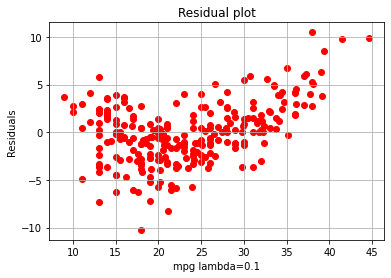

[array([4.04214766]), array([-4.55815039]), array([0.84313538]), array([1.67857541]), array([-3.26594429]), array([4.45283102]), array([-0.89031137]), array([2.55327758]), array([0.22619515]), array([4.30277198]), array([0.5497015]), array([-3.88495288]), array([3.77782913]), array([-0.88347686]), array([-3.65259319]), array([5.52344326]), array([6.58659795]), array([0.43960104]), array([2.96376648]), array([0.31103041]), array([-3.23321212]), array([5.28976758]), array([2.08366424]), array([-0.98441035]), array([1.90255985]), array([-0.13892368]), array([-5.87990684]), array([-0.79251842]), array([-1.7334107]), array([3.13760327]), array([0.1761218]), array([-2.51874831]), array([9.79054371]), array([-1.48121388]), array([1.75705592]), array([1.35658709]), array([-1.56054342]), array([-1.72856703]), array([-2.59136157]), array([-5.68262182]), array([-1.35960169]), array([-2.71492151]), array([3.57868031]), array([-0.24618217]), array([2.51425445]), array([2.52459725]), array([-3.26601

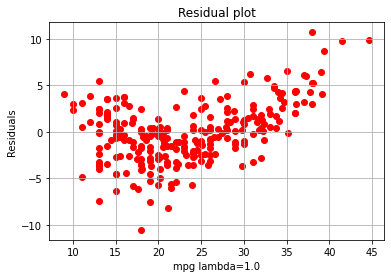

[array([4.09065097]), array([-4.56396469]), array([0.88876749]), array([1.66782572]), array([-3.30078488]), array([4.41660436]), array([-0.95341555]), array([2.530208]), array([0.27951189]), array([4.31483925]), array([0.56449303]), array([-3.89986207]), array([3.82938605]), array([-0.95965395]), array([-3.60292399]), array([5.48437061]), array([6.54317639]), array([0.4722015]), array([2.99935542]), array([0.28395472]), array([-3.21695851]), array([5.29426759]), array([2.12821959]), array([-0.98581186]), array([1.88689392]), array([-0.12569145]), array([-5.85412234]), array([-0.80907473]), array([-1.8030242]), array([3.16004924]), array([0.08182067]), array([-2.55507552]), array([9.80229123]), array([-1.53586077]), array([1.80955762]), array([1.33153369]), array([-1.64829342]), array([-1.83055706]), array([-2.55221579]), array([-5.65185222]), array([-1.40637136]), array([-2.74854918]), array([3.67384746]), array([-0.28455865]), array([2.57914591]), array([2.49228361]), array([-3.189832

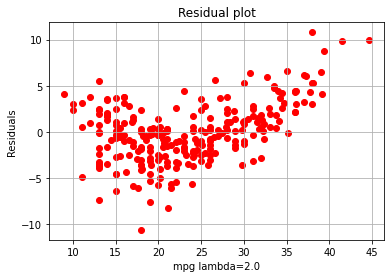

[array([4.08166996]), array([-4.5476018]), array([0.95493181]), array([1.6435391]), array([-3.32899215]), array([4.36158613]), array([-1.00254157]), array([2.52412227]), array([0.33081557]), array([4.3273218]), array([0.58313741]), array([-3.89034814]), array([3.87651154]), array([-1.0219469]), array([-3.56515372]), array([5.50193099]), array([6.5012489]), array([0.53037215]), array([3.0125723]), array([0.27662953]), array([-3.22299741]), array([5.28378314]), array([2.16387149]), array([-0.9834987]), array([1.86530271]), array([-0.1163531]), array([-5.86504939]), array([-0.79791323]), array([-1.84303538]), array([3.13405592]), array([-0.0186916]), array([-2.5896152]), array([9.81075393]), array([-1.64497125]), array([1.87220143]), array([1.29375054]), array([-1.74604761]), array([-1.89121331]), array([-2.51121988]), array([-5.59645302]), array([-1.44944324]), array([-2.80032639]), array([3.77912745]), array([-0.33824037]), array([2.6644158]), array([2.45098899]), array([-3.11560637]), 

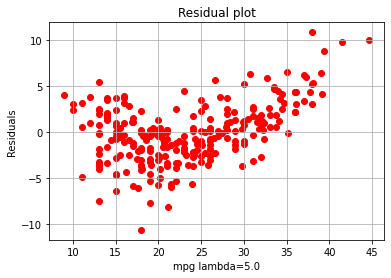

[array([4.00822382]), array([-4.51055927]), array([1.02889828]), array([1.60985824]), array([-3.34396152]), array([4.29848363]), array([-1.02351394]), array([2.53886404]), array([0.36753117]), array([4.33730267]), array([0.60214865]), array([-3.85525407]), array([3.90648347]), array([-1.05341568]), array([-3.55038777]), array([5.57983394]), array([6.47124518]), array([0.60445114]), array([2.99609392]), array([0.29290638]), array([-3.25263889]), array([5.25891584]), array([2.18096579]), array([-0.97745762]), array([1.84262741]), array([-0.11399442]), array([-5.91446097]), array([-0.75758754]), array([-1.83927201]), array([3.05847677]), array([-0.10197825]), array([-2.61365878]), array([9.81378953]), array([-1.78950468]), array([1.9315553]), array([1.25077909]), array([-1.83160123]), array([-1.88992824]), array([-2.47761985]), array([-5.5260603]), array([-1.47741207]), array([-2.85974574]), array([3.86911373]), array([-0.39639323]), array([2.75269953]), array([2.40974474]), array([-3.061

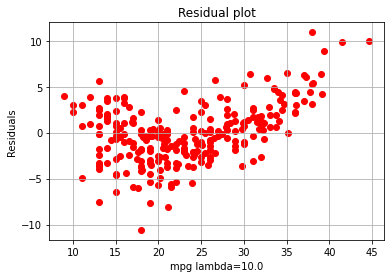

[array([3.8596732]), array([-4.4463374]), array([1.14334993]), array([1.55533841]), array([-3.36196415]), array([4.20129265]), array([-1.03725125]), array([2.57219679]), array([0.41339532]), array([4.35105758]), array([0.6319751]), array([-3.7890743]), array([3.93871473]), array([-1.08237349]), array([-3.54269599]), array([5.72905529]), array([6.43380852]), array([0.72511273]), array([2.95172449]), array([0.32810137]), array([-3.3086767]), array([5.2148935]), array([2.19630857]), array([-0.96593119]), array([1.80998951]), array([-0.11533965]), array([-6.00694594]), array([-0.68091433]), array([-1.80762515]), array([2.91681398]), array([-0.21485089]), array([-2.64276382]), array([9.81638916]), array([-2.02162248]), array([2.01782084]), array([1.18504092]), array([-1.95075802]), array([-1.85221429]), array([-2.43107895]), array([-5.41298135]), array([-1.50846627]), array([-2.94997624]), array([3.98848819]), array([-0.48458571]), array([2.88562015]), array([2.34991541]), array([-2.9914150

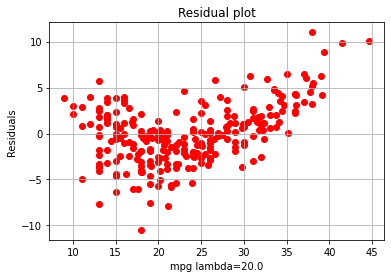

[array([3.52539986]), array([-4.32819549]), array([1.37098156]), array([1.44860053]), array([-3.4110341]), array([4.0159351]), array([-1.0456052]), array([2.64065854]), array([0.49387983]), array([4.38288403]), array([0.70005321]), array([-3.65437855]), array([3.98211152]), array([-1.12660683]), array([-3.54239851]), array([6.04029777]), array([6.36327854]), array([0.97705474]), array([2.8353905]), array([0.39107015]), array([-3.4197072]), array([5.13224344]), array([2.2236374]), array([-0.93584616]), array([1.75454983]), array([-0.12518598]), array([-6.18733666]), array([-0.51987767]), array([-1.72218302]), array([2.6120794]), array([-0.42542602]), array([-2.69273369]), array([9.82728409]), array([-2.47562517]), array([2.1845396]), array([1.05879192]), array([-2.175631]), array([-1.7518074]), array([-2.3371526]), array([-5.18585579]), array([-1.55264166]), array([-3.11693605]), array([4.18405177]), array([-0.65568467]), array([3.1484137]), array([2.23948387]), array([-2.86139745]), ar

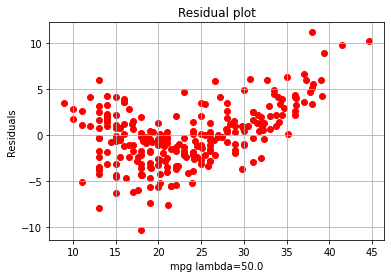

[array([3.17364154]), array([-4.24952211]), array([1.57914677]), array([1.35367902]), array([-3.48901904]), array([3.86558395]), array([-1.03732221]), array([2.68948268]), array([0.55499086]), array([4.43274905]), array([0.78401044]), array([-3.54309103]), array([3.99967954]), array([-1.16525586]), array([-3.55314568]), array([6.32260782]), array([6.28688239]), array([1.22686196]), array([2.69123585]), array([0.4195792]), array([-3.50967555]), array([5.07998798]), array([2.2592045]), array([-0.88721923]), array([1.71829861]), array([-0.14174682]), array([-6.3282935]), array([-0.37487557]), array([-1.62814032]), array([2.31083064]), array([-0.61413961]), array([-2.73355961]), array([9.85433415]), array([-2.87007994]), array([2.33234949]), array([0.94741967]), array([-2.37728672]), array([-1.6510785]), array([-2.23970344]), array([-4.97781307]), array([-1.57167017]), array([-3.24888893]), array([4.30072619]), array([-0.808134]), array([3.39293816]), array([2.14745133]), array([-2.7437260

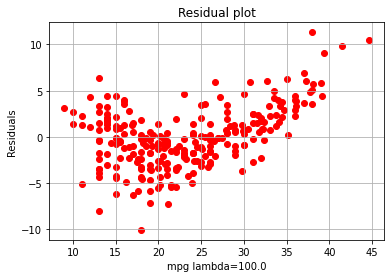

[array([1.36415986]), array([-4.46780717]), array([2.13148502]), array([1.01069622]), array([-4.0840473]), array([3.91938758]), array([-0.8278361]), array([2.48646507]), array([0.52337945]), array([5.10428675]), array([1.42694403]), array([-3.53032345]), array([3.80995696]), array([-1.33603236]), array([-3.67200657]), array([6.89122118]), array([5.7969397]), array([2.19426626]), array([1.67329364]), array([-0.03854823]), array([-3.61696709]), array([5.48514855]), array([2.66727635]), array([-0.23448272]), array([1.68138157]), array([-0.26405995]), array([-6.44519606]), array([-0.12259952]), array([-1.1579561]), array([1.05425306]), array([-1.1062879]), array([-2.79723963]), array([10.2618116]), array([-3.6451258]), array([2.66047487]), array([0.58546438]), array([-2.91823199]), array([-1.28891013]), array([-1.76024664]), array([-4.43007595]), array([-1.28763133]), array([-3.3148746]), array([3.72552703]), array([-1.19676237]), array([4.11864475]), array([1.89645935]), array([-2.3934404

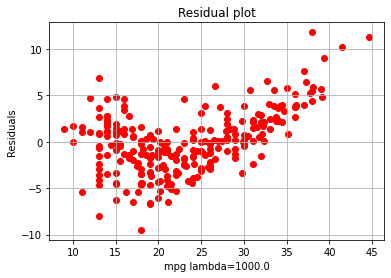

[array([-3.10977849]), array([-4.59332955]), array([3.08143252]), array([-0.41667099]), array([-3.8909735]), array([5.9760098]), array([-0.50859212]), array([2.10342408]), array([1.38326726]), array([6.8382013]), array([2.95782044]), array([-3.7739759]), array([3.18909333]), array([-2.19113561]), array([-3.6909864]), array([4.70708017]), array([6.65766239]), array([3.73581209]), array([-1.17909278]), array([-1.8897398]), array([-3.88060659]), array([7.32864494]), array([4.63063288]), array([1.38087059]), array([-0.02036183]), array([-0.57601158]), array([-7.18857604]), array([-0.13952986]), array([-0.21124191]), array([-1.93545381]), array([-0.29043977]), array([-2.494263]), array([11.55706808]), array([-3.28128893]), array([3.69808195]), array([-0.49824882]), array([-2.70155726]), array([-0.50575593]), array([-0.89348094]), array([-3.85766756]), array([0.11524641]), array([-2.30845301]), array([2.03472842]), array([-1.47495057]), array([4.45636811]), array([0.74755517]), array([-0.835

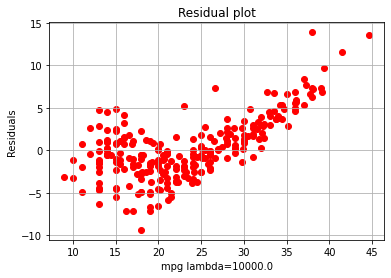

In [ ]:
beta_idx = 0
for lambda_ in lambdas: 
  beta = betas[beta_idx]
  beta_idx += 1
  xlabel = 'mpg lambda='+str(lambda_)
  e_i_residuals_list = [] 

  for i in range(n_train): 
    x_i = X_train[i,:] #access i-th row of X
    y_i = Y_train[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    e_i_residuals_list.append(e_i) #append the value of e_i to the list 
  print(e_i_residuals_list)

  #plot the residuals e_i against the actual observations y_i
  plt.scatter(auto_mpg_train['mpg'], e_i_residuals_list,color='r')
  plt.title("Residual plot")
  plt.xlabel(xlabel)
  plt.ylabel("Residuals")
  plt.grid()
  plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case. 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Let us compute $R^2$. 

In [ ]:
#We shall now compute R^2 for auto mpg data
R_sq_train = []
R_sq_val = []
MSE_train = []
MSE_val = []
#first we shall compute y_bar 
y_bar_train = 0
for i in range(n_train): #access each row from the data set 
  y_i_train = float(auto_mpg_train.iat[i,0]) #access element at mpg column
  y_bar_train += y_i_train

y_bar_train /= n_train
print('y_bar_train',y_bar_train)

y_bar_val = 0
for i in range(n_val): #access each row from the data set 
  y_i_val = float(auto_mpg_val.iat[i,0]) #access element at mpg column
  y_bar_val += y_i_val

y_bar_val /= n_val
print('y_bar_val',y_bar_val)


#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy_train = 0
for i in range(n_train): #access each row from the data set 
  y_i_train = float(auto_mpg_train.iat[i,0]) #access element at mpg column
  sigma_yy_train += (y_i_train-y_bar_train)**2

print('sigma_yy_train:', sigma_yy_train)

sigma_yy_val = 0
for i in range(n_val): #access each row from the data set 
  y_i_val = float(auto_mpg_val.iat[i,0]) #access element at mpg column
  sigma_yy_val += (y_i_val-y_bar_val)**2

print('sigma_yy_val:', sigma_yy_val)
print('\n_________________________\n')

#now we can compute sum of squared residuals 
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx+=1
  sum_sq_residuals_train = 0
  sum_sq_residuals_val = 0
  for i in range(n_train): #access each row from the data set 
    x_i_train = X_train[i,:] #access i-th row of X
    y_i_train = Y_train[i] #access i-th row of y

    y_pred_i_train = np.dot(x_i_train,beta) #compute the prediction obtained using the regression coefficients 
    e_i_train = y_i_train - y_pred_i_train #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals_train += (e_i_train)**2

  for i in range(n_val): #access each row from the data set 
    x_i_val = X_val[i,:] #access i-th row of X
    y_i_val = Y_val[i] #access i-th row of y

    y_pred_i_val = np.dot(x_i_val,beta) #compute the prediction obtained using the regression coefficients 
    e_i_val = y_i_val - y_pred_i_val #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals_val += (e_i_val)**2


  print('lambda:',lambda_)
  print('sum of squared residuals for training data:', sum_sq_residuals_train)
  MSE_train.append(sum_sq_residuals_train/n_train)
  #Then we will compute the R^2 quantity
  R_sq = 1-sum_sq_residuals_train/sigma_yy_train
  R_sq_train.append(R_sq)
  print('R^2 for training data:',R_sq)

  print('sum of squared residuals for validation data:', sum_sq_residuals_val)
  MSE_val.append(sum_sq_residuals_val/n_val)

  #Then we will compute the R^2 quantity
  R_sq_vali = 1-sum_sq_residuals_val/sigma_yy_val
  R_sq_val.append(R_sq_vali)
  print('R^2 for validation data:',R_sq_vali)
  print('\n*******************************************************************\n')

y_bar_train 23.18366533864542
y_bar_val 23.05714285714286
sigma_yy_train: 14573.343027888452
sigma_yy_val: 4289.494285714284

_________________________

lambda: 0.0
sum of squared residuals for training data: [2599.19525082]
R^2 for training data: [0.82164729]
sum of squared residuals for validation data: [841.36026111]
R^2 for validation data: [0.80385561]

*******************************************************************

lambda: 1e-05
sum of squared residuals for training data: [2599.19525086]
R^2 for training data: [0.82164729]
sum of squared residuals for validation data: [841.36119897]
R^2 for validation data: [0.80385539]

*******************************************************************

lambda: 0.0001
sum of squared residuals for training data: [2599.19525471]
R^2 for training data: [0.82164729]
sum of squared residuals for validation data: [841.3696381]
R^2 for validation data: [0.80385342]

*******************************************************************

lambda: 0.00

**How to choose good value of Lambda-**

:**Graph between $R^2$ and $λ$ values for training and validation data-**

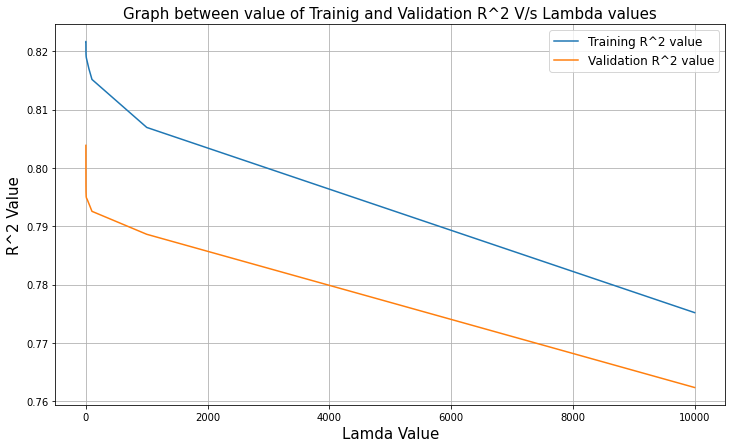

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,R_sq_train,label = "Training R^2 value")
plt.plot(lambdas,R_sq_val,label = "Validation R^2 value")
plt.ylabel("R^2 Value",fontsize = 15)
plt.xlabel("Lamda Value",fontsize = 15)
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between value of Trainig and Validation R^2 V/s Lambda values",fontsize = 15)
plt.grid()
plt.show()

**Graph between $MSE$ and $λ$ values for training and validation data-**

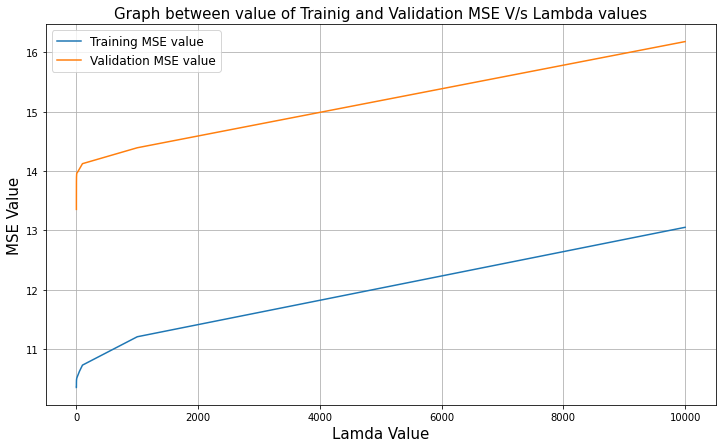

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,MSE_train,label = "Training MSE value")
plt.plot(lambdas,MSE_val,label = "Validation MSE value")
plt.ylabel("MSE Value",fontsize = 15)
plt.xlabel("Lamda Value",fontsize = 15)
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between value of Trainig and Validation MSE V/s Lambda values",fontsize = 15)
plt.grid()
plt.show()

As we can see, increasing the value of $\lambda$ leads to lower $R^2$ values which indicates that the unexplained variations captured by the regression parameters is not significant when compared to the variations captured by the mean $\bar{\mathbf{y}}$. 

Also note that increasing $\lambda$ leads to residual plots where the variance in the predicted values become smaller and smaller when compared to lower values of $\lambda$. However it might turn out that on an average, the estimated parameters might be away from the actual parameters which were possibly responsible for the data. This leads to a larger bias in the estimated model parameters. This phenomenon is one explanation for the popular $\textbf{bias-variance}$ tradeoff.

# **Doing K-Fold Cross Validatiion-**

In [ ]:
def compute_Rsquared_and_MSE(data, beta, X, Y): 

  #first we shall compute y_bar 
  y_bar = 0.
  n = len(data)
  for i in range(n): #access each row from the data set 
    y_i= float(data.iat[i,0]) #access element at mpg column
    y_bar += y_i

  y_bar /= n
  #print('y_bar',y_bar)


  #Next we shall compute sigma_yy, which is the variance of y 
  sigma_yy = 0
  for i in range(n): #access each row from the data set 
    y_i = float(data.iat[i,0]) #access element at mpg column
    sigma_yy += (y_i-y_bar)**2

  #print('sigma_yy:', sigma_yy)

  #print('\n_________________________\n')

  #now we can compute sum of squared residuals 
  sum_sq_residuals = 0.
  for i in range(n): #access each row from the data set 
    x_i = X[i,:] #access i-th row of X
    y_i = Y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals += (e_i)**2

    
  #Then we will compute the R^2 quantity and MSE
  R_sq = 1-sum_sq_residuals/sigma_yy
  MSE = sum_sq_residuals/n
  print('R^2 :',R_sq, ' MSE:',MSE)
  return R_sq, MSE


In [ ]:

import scipy
from scipy import linalg
seed = 2000
auto_mpg_train_initial = auto_mpg_data.sample(frac=0.8,random_state=seed)
auto_mpg_test = auto_mpg_data.drop(auto_mpg_train_initial.index)


seeds = [100, 200,300,400,500]

lambdas = [0.0001, 0.001, 0.01, 0.1, 1,10,100,1000]

train_R2_seeds = [] 
val_R2_seeds = [] 

train_MSE_seeds = [] 
val_MSE_seeds = [] 
cols = [1,2,3,4,5,6,7]
response_cols = [0]

for seed in seeds: 
  auto_mpg_train = auto_mpg_train_initial.sample(frac=0.8,random_state=seed)
  auto_mpg_val = auto_mpg_train_initial.drop(auto_mpg_train.index)

  X_train = auto_mpg_train[auto_mpg_train.columns[cols]]
  X_val = auto_mpg_val[auto_mpg_val.columns[cols]]
  

  X_train = X_train.to_numpy()
  X_val = X_val.to_numpy()

  X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
  X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1), dtype=X_val.dtype)))
  
  Y_train = auto_mpg_train[auto_mpg_train.columns[response_cols]].to_numpy()
  Y_val = auto_mpg_val[auto_mpg_val.columns[response_cols]].to_numpy()

  train_R2_lambdas = []
  val_R2_lambdas = []

  train_MSE_lambdas = []
  val_MSE_lambdas = []
  
  for lambda_ in lambdas:
    XTX = np.matmul(np.transpose(X_train),X_train)
    Xy = np.matmul(np.transpose(X_train),Y_train)
    I = np.identity(X_train.shape[1])

    beta =scipy.linalg.solve( XTX+lambda_*I,Xy)
    print('lambda:',lambda_)
    print('beta:',beta)
    print('***************')

    train_R2, train_MSE = compute_Rsquared_and_MSE(auto_mpg_train, beta, X_train, Y_train)
    train_R2_lambdas.append(train_R2)
    train_MSE_lambdas.append(train_MSE)

    val_R2, val_MSE = compute_Rsquared_and_MSE(auto_mpg_val, beta, X_val, Y_val)
    val_R2_lambdas.append(val_R2)
    val_MSE_lambdas.append(val_MSE)

  train_R2_seeds.append(np.array(train_R2_lambdas))
  train_MSE_seeds.append(np.array(train_MSE_lambdas))

  val_R2_seeds.append(np.array(val_R2_lambdas))
  val_MSE_seeds.append(np.array(val_MSE_lambdas))

val_R2_seeds = np.array(val_R2_seeds).squeeze()
print(val_R2_seeds)

mean_val_R2_lambdas = np.mean(val_R2_seeds,axis=0)

train_R2_seeds = np.array(train_R2_seeds).squeeze()
print(train_R2_seeds)

mean_train_R2_lambdas = np.mean(train_R2_seeds,axis=0)

#print('k-fold train R2 values:', train_R2_seeds)

#print('k-fold train MSEs:', train_MSE_seeds)

print('k-fold val R2 values:', mean_val_R2_lambdas.squeeze())
print('k-fold train R2 values:', mean_train_R2_lambdas.squeeze())

#print('k-fold val MSEs:', val_MSE_seeds)


best_lambda_idx = np.argmax(mean_val_R2_lambdas)
best_lambda = lambdas[best_lambda_idx]

print('best lambda:', best_lambda)


X_train = auto_mpg_train_initial[auto_mpg_train_initial.columns[cols]]
X_train = X_train.to_numpy()

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
Y_train = auto_mpg_train_initial[auto_mpg_train_initial.columns[response_cols]].to_numpy()

X_test = auto_mpg_test[auto_mpg_test.columns[cols]]
X_test = X_test.to_numpy()
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))
Y_test = auto_mpg_test[auto_mpg_test.columns[response_cols]].to_numpy()


XTX = np.matmul(np.transpose(X_train),X_train)
Xy = np.matmul(np.transpose(X_train),Y_train)
I = np.identity(X_train.shape[1])

beta =scipy.linalg.solve( XTX+best_lambda*I,Xy)
print('lambda:',best_lambda)
print('Final beta:',beta)
print('***************')

train_R2, train_MSE = compute_Rsquared_and_MSE(auto_mpg_train_initial, beta, X_train, Y_train)

test_R2, test_MSE = compute_Rsquared_and_MSE(auto_mpg_test, beta, X_test, Y_test)

print('Train R^2 :', train_R2, ' Train MSE:', train_MSE)
print('Test R^2 :', test_R2, ' Test MSE:', test_MSE)






lambda: 0.0001
beta: [[-5.82742280e-01]
 [ 2.18375761e-02]
 [-6.69655843e-03]
 [-6.96896480e-03]
 [ 7.75578345e-02]
 [ 8.14884127e-01]
 [ 1.26472508e+00]
 [-2.12610407e+01]]
***************
R^2 : [0.83384621]  MSE: [10.44638859]
R^2 : [0.79132971]  MSE: [12.1565866]
lambda: 0.001
beta: [[-5.83278080e-01]
 [ 2.18419036e-02]
 [-6.76838811e-03]
 [-6.96750498e-03]
 [ 7.70437483e-02]
 [ 8.14296667e-01]
 [ 1.26451053e+00]
 [-2.12027179e+01]]
***************
R^2 : [0.83384612]  MSE: [10.44639401]
R^2 : [0.79133211]  MSE: [12.15644667]
lambda: 0.01
beta: [[-5.88475598e-01]
 [ 2.18838398e-02]
 [-7.46553665e-03]
 [-6.95333718e-03]
 [ 7.20539500e-02]
 [ 8.08594581e-01]
 [ 1.26242458e+00]
 [-2.06366169e+01]]
***************
R^2 : [0.83383796]  MSE: [10.44690747]
R^2 : [0.79134657]  MSE: [12.15560445]
lambda: 0.1
beta: [[-6.28156934e-01]
 [ 2.22006034e-02]
 [-1.28168485e-02]
 [-6.84462918e-03]
 [ 3.37290203e-02]
 [ 7.64790220e-01]
 [ 1.24612524e+00]
 [-1.62877572e+01]]
***************
R^2 : [0.8333

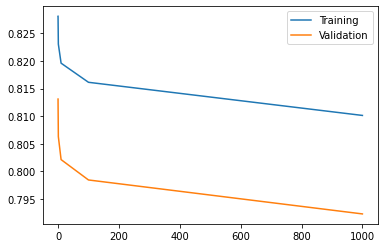

In [ ]:
plt.plot(lambdas, mean_train_R2_lambdas,label = "Training")
plt.plot(lambdas, mean_val_R2_lambdas,label = "Validation")
plt.legend()
plt.show()

# **Taking the lambda value as 0.0001.**

In [ ]:
X_train_full = auto_mpg_train_initial[auto_mpg_train_initial.columns[cols]]
X_train_full = X_train_full.to_numpy()
X_train_full = np.hstack((X_train_full, np.ones((X_train_full.shape[0], 1), dtype=X_train_full.dtype)))
Y_train_full = auto_mpg_train_initial[auto_mpg_train_initial.columns[response_cols]].to_numpy()

**Training on full training dataset-**

In [ ]:
XTX = np.matmul(np.transpose(X_train_full),X_train_full)
lambda_ = best_lambda
Xy = np.matmul(np.transpose(X_train_full),Y_train_full)
I = np.identity(XTX.shape[0])
beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
print('lambda:',lambda_)
print('beta:',beta)
print('***************')

lambda: 0.0001
beta: [[-4.66875592e-01]
 [ 2.38776821e-02]
 [-1.29489621e-02]
 [-7.15865377e-03]
 [ 1.32163090e-01]
 [ 8.02508640e-01]
 [ 1.32731071e+00]
 [-2.10321282e+01]]
***************


**Checking performance on test datset-**

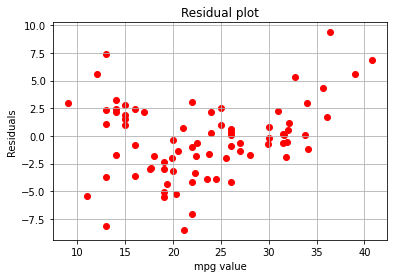

In [ ]:
e_i_residuals_list = [] 
n = len(auto_mpg_test.index)
for i in range(n): 
  x_i = X_test[i,:] #access i-th row of X
  y_i = Y_test[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(auto_mpg_test['mpg'], e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("mpg value")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [ ]:
#first we shall compute y_bar 
y_bar = 0
for i in range(n): #access each row from the data set 
  y_i = float(auto_mpg_test.iat[i,0]) #access element at mpg column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(auto_mpg_test.iat[i,0]) #access element at mpg column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals 

sum_sq_residuals = 0
for i in range(n): #access each row from the data set 
  x_i = X_test[i,:] #access i-th row of X
  y_i = Y_test[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals += (e_i)**2

print('lambda:',lambda_)
print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)
print('*********************')

y_bar 23.051282051282048
sigma_yy: 4346.234871794873
lambda: 0.0001
sum of squared residuals: [906.9726397]
R^2: [0.79131992]
*********************


$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

